# Airbnb Business Model

Airbnb is achieve huges success and their business model are extensively studied by various firm.

# Install packages

In [1]:
pip install geopandas

In [2]:
pip install mplleaflet

In [3]:
!apt-get install libproj-dev proj-bin proj-data
!apt-get install libgeos-dev
!pip uninstall -y shapely
!pip install --no-binary shapely shapely
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
  Using cached https://files.pythonhosted.org/packages/42/f3/0e1bc2c4f15e05e30c6b99322b9ddaa2babb3f43bc7df2698efdc1553439/Shapely-1.7.1.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [4]:
!pip install geoplot

In [7]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

# Read in 2020 Boston Airbnb data and convert sample data to geopandas data for plotting

In [ ]:
df = pd.read_csv('./listings.csv.gz')
df_sample = df.sample(n=668, random_state=36)
boston_2020_geodf = gpd.GeoDataFrame(    df_sample[['price','availability_365']], geometry=gpd.points_from_xy(df_sample.longitude, df_sample.latitude) )

In [9]:
boston_2020_geodf.head(3)

,price,availability_365,geometry
2737,$153.00,113,POINT (-71.06482 42.35300)
2149,$27.00,0,POINT (-71.08010 42.31968)
756,$70.00,0,POINT (-71.10005 42.31689)


# Revenue calculation equation
##    Revenue = price * (365 - available_date)

In [10]:
import re
def str2float(x):
    return float(re.sub("[\$,]","", x))
boston_2020_geodf['revenue'] = boston_2020_geodf.price.apply(str2float)*(365-boston_2020_geodf.availability_365)
boston_2020_geodf.head(3)

,price,availability_365,geometry,revenue
2737,$153.00,113,POINT (-71.06482 42.35300),38556.0
2149,$27.00,0,POINT (-71.08010 42.31968),9855.0
756,$70.00,0,POINT (-71.10005 42.31689),25550.0


# Plot 2020 Boston sample host revenue on map. It would be interesting to find out how to improve occupancy rate as price is largely determined by property and not easily to increase.

# Hot color illustrate high revenue Airbnb host. The colder the color the fewer the revenue

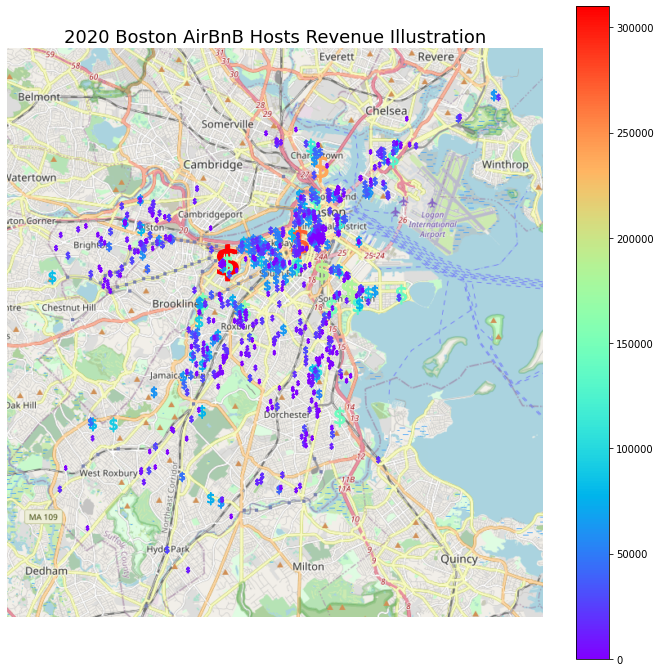

In [11]:
ax = gplt.pointplot(boston_2020_geodf, scale=boston_2020_geodf.revenue, limits=(5,36), hue=boston_2020_geodf.revenue, projection=gcrs.WebMercator(), 
                    figsize=(12, 12), legend=True, legend_var='hue', cmap='rainbow', marker=r'$\$$')
gplt.webmap(boston_2020_geodf, ax=ax)
plt.title('2020 Boston AirBnB Hosts Revenue Illustration', fontsize=18);